In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
df = pd.read_csv(r"C:\Users\priya\Downloads\autos.csv", encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df[['abtest','fuelType','model','gearbox','vehicleType','notRepairedDamage']].mode()
df.replace({'abtest':{np.nan:'test'},'fuelType':{np.nan:'benzin'},'model':{np.nan:'golf'},'gearbox':{np.nan:'manuell'},'vehicleType':{np.nan:'limousine'},'notRepairedDamage':{np.nan:'nein'}},inplace=True)

In [8]:
d=df.astype({"yearOfRegistration":"int16","monthOfRegistration":"int16"})

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          371528 non-null  object
 7   yearOfRegistration   371528 non-null  int16 
 8   gearbox              371528 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                371528 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int16 
 13  fuelType             371528 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    371528 non-nu

###  What is the Average price of vehicle by fuel type and gearbox type.Give a plot

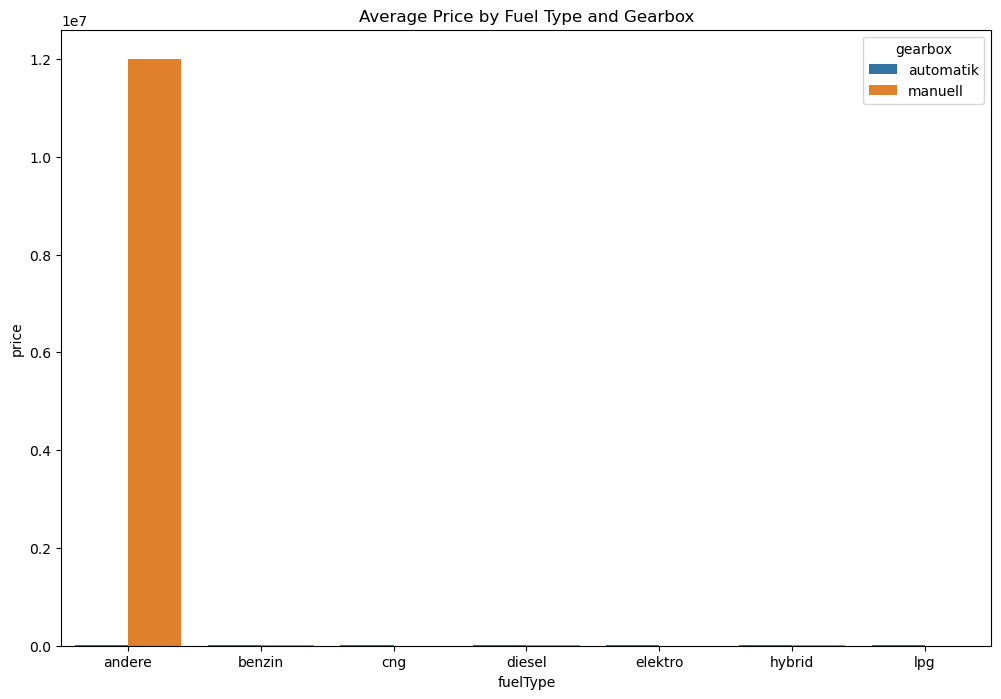

In [10]:
avg_price_fueltype=df.groupby(['fuelType', 'gearbox'])['price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_fueltype, x='fuelType', y='price', hue='gearbox')

plt.title('Average Price by Fuel Type and Gearbox')
plt.show()

### What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

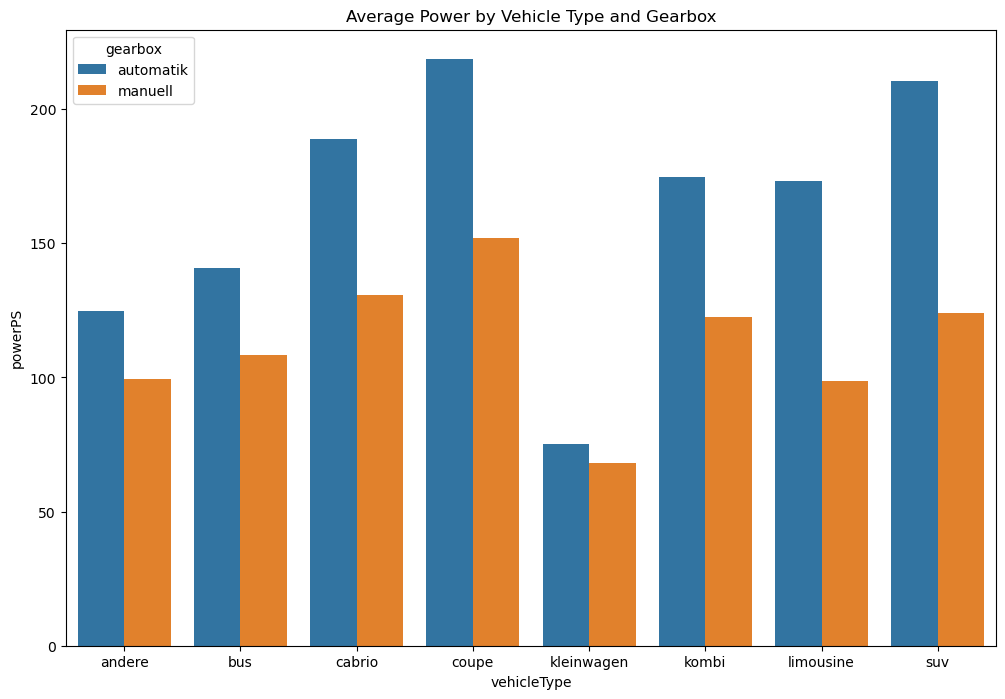

In [12]:
avg=df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg, x='vehicleType', y='powerPS', hue='gearbox')

plt.title('Average Power by Vehicle Type and Gearbox')
plt.show()

###  What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

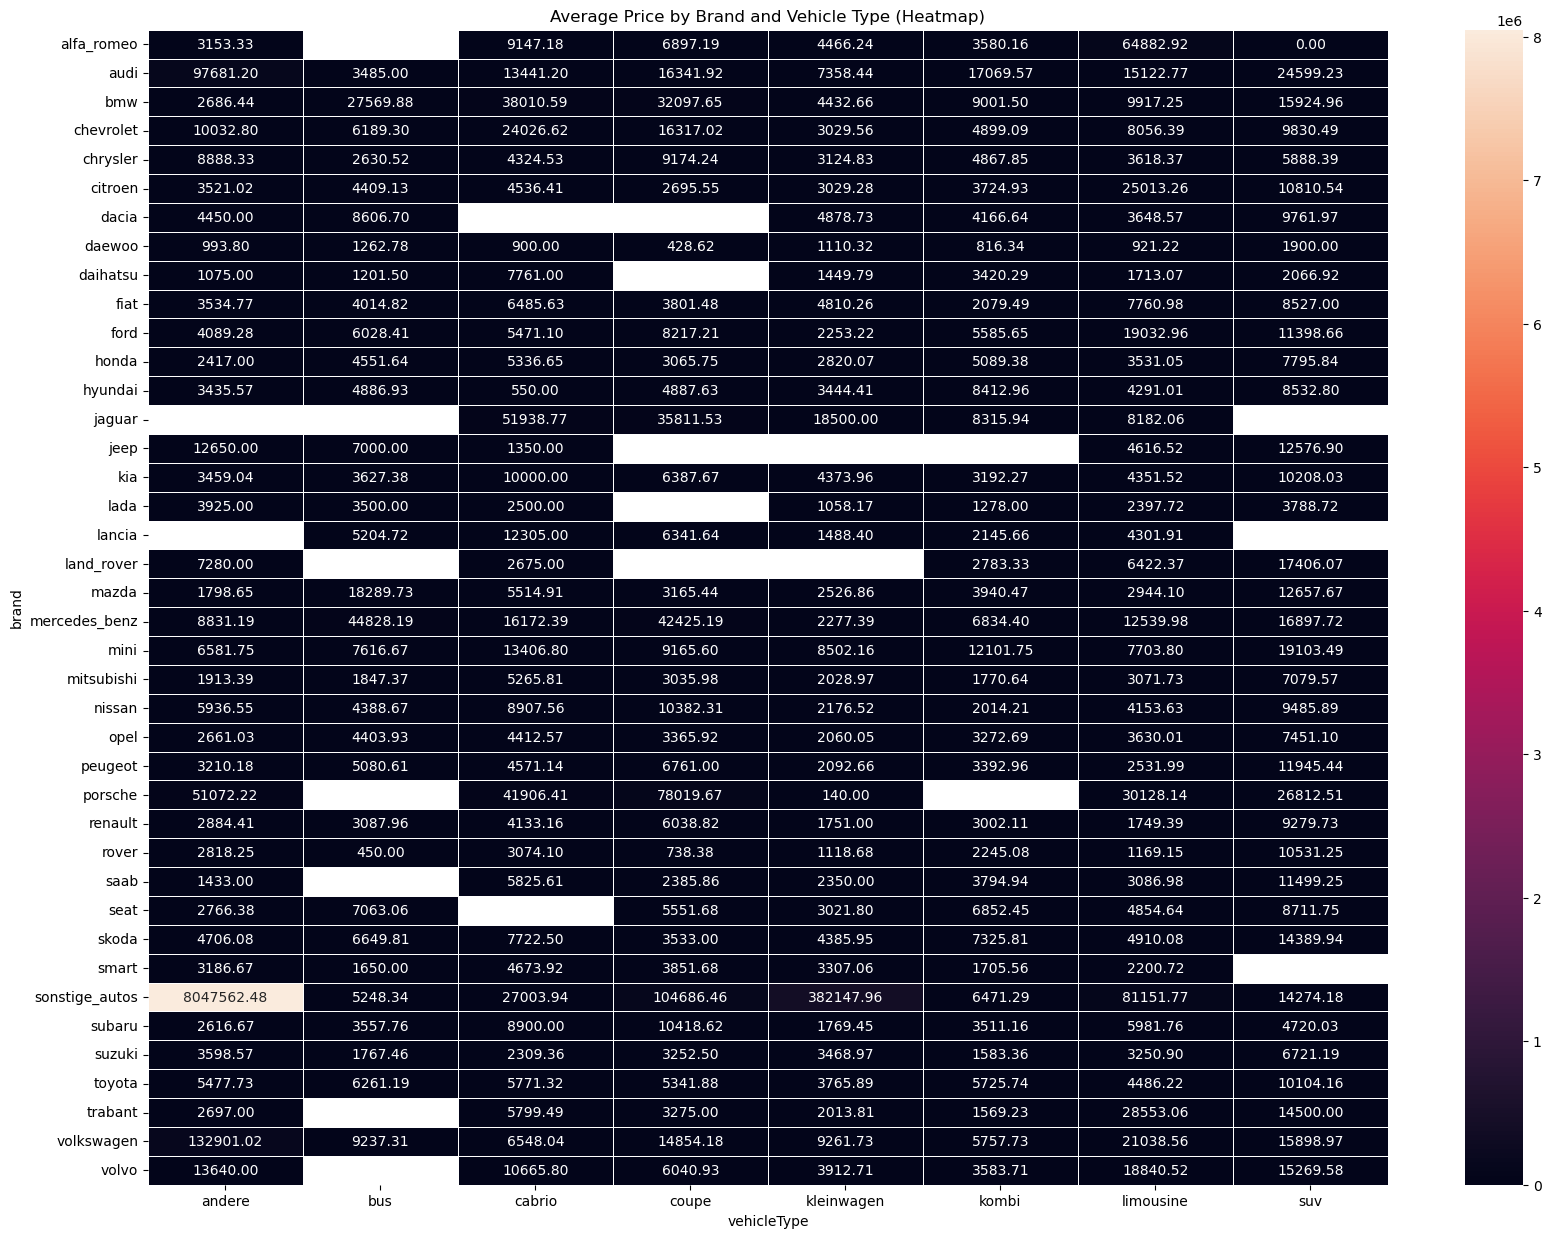

In [16]:
data=df.groupby(['brand', 'vehicleType'])['price'].mean().unstack()
plt.figure(figsize=(20, 15))
sns.heatmap(data, annot=True, fmt=".2f", linewidths=.5)

plt.title('Average Price by Brand and Vehicle Type (Heatmap)')
plt.show()